# 복잡한 집계 함수를 groupby와 함께 사용하기
이전 챕터에서 groupby 데이터프레임 객체를 생성해서 그룹별 요약통계를 보는 데에 활용했음.  
groupby를 사용해 요약통계를 생성하는 단계는 다음 세 단계로 이루어진다.
1. 하나 이상의 범주형 변수를 기초로 groupby 데이터프레임을 생성
2. 요약통계에 사용할 열을 선택
3. 집계 함수를 선택
  
이번 챕터에서는 
1) '📍그룹을 만들고 > 📍집계 변수를 선택 >📍 집계 함수 선택'하는 전 과정을 chaining을 통해 한 줄로 작성하는 실습  
2) groupby 데이터프레임 객체의 장점을 살려서 '집계 열'과 '함수'를 다양한 방식으로 선택해봄

In [1]:
import pandas as pd
nls97 = pd.read_csv('data/nls97b.csv')
nls97.set_index('personid', inplace=True)

### 데이터 구조 검토하기
info()를 통해 범주형 변수로 어떤 게 있는지 확인함

In [2]:
nls97.iloc[:,0:7].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8984 entries, 100061 to 999963
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 8984 non-null   object 
 1   birthmonth             8984 non-null   int64  
 2   birthyear              8984 non-null   int64  
 3   highestgradecompleted  6663 non-null   float64
 4   maritalstatus          6672 non-null   object 
 5   childathome            4791 non-null   float64
 6   childnotathome         4791 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 561.5+ KB


### 범주형 데이터 검토하기

In [8]:
catvars = ['gender', 'maritalstatus','highestdegree']
for col in catvars:
    # sep : 프린트되는 각 요소 사이에 공백
    # end : 프린트된 내용 맨 마지막에 공백
    print(col, nls97[col].value_counts().sort_index(), sep='\n\n', end='\n\n\n')

gender

Female    4385
Male      4599
Name: gender, dtype: int64


maritalstatus

Divorced          663
Married          3066
Never-married    2766
Separated         154
Widowed            23
Name: maritalstatus, dtype: int64


highestdegree

0. None             953
1. GED             1146
2. High School     3667
3. Associates       737
4. Bachelors       1673
5. Masters          603
6. PhD               54
7. Professional     120
Name: highestdegree, dtype: int64




### 연속형 변수의 기술통계를 검토하기

In [13]:
contvars = ['satmath', 'satverbal', 'weeksworked06', 'gpaoverall', 'childathome']

pd.options.display.float_format = '{:,.2f}'.format

nls97[contvars].describe()

,satmath,satverbal,weeksworked06,gpaoverall,childathome
count,"1,407.00","1,406.00","8,340.00","6,004.00","4,791.00"
mean,500.59,499.72,38.43,2.82,1.86
std,114.95,112.17,18.92,0.62,1.26
min,7.00,14.00,0.00,0.10,0.00
25%,430.00,430.00,27.00,2.43,1.00
50%,500.00,500.00,51.00,2.86,2.00
75%,580.00,570.00,52.00,3.26,3.00
max,800.00,800.00,52.00,4.17,9.00


### 성별 및 학력에 따른 점수 살펴보기
1. groupby에 열 이름을 전달해, 해당 열을 기준으로 그룹핑  
2. 통계를 낼 열을 지정하고 통계 종류 선택

* 성별 및 학력별 학점(GPA) 성적

In [24]:
nls97.groupby('gender')['gpaoverall'].max()

gender
Female   4.17
Male     4.10
Name: gpaoverall, dtype: float64

In [29]:
nls97.groupby(['highestdegree', 'gender'])['gpaoverall'].max()

highestdegree    gender
0. None          Female   4.00
                 Male     4.00
1. GED           Female   3.91
                 Male     4.00
2. High School   Female   4.17
                 Male     4.00
3. Associates    Female   4.00
                 Male     3.83
4. Bachelors     Female   4.07
                 Male     4.10
5. Masters       Female   4.08
                 Male     4.04
6. PhD           Female   4.00
                 Male     3.99
7. Professional  Female   4.11
                 Male     4.00
Name: gpaoverall, dtype: float64

* 성별 및 학력별로 SAT 수학과 언어점수

In [26]:
nls97.groupby(['gender','highestdegree'])[['satmath','satverbal']].mean()

satmath  satverbal
gender highestdegree                      
Female 0. None           332.60     408.80
       1. GED            405.00     390.00
       2. High School    430.77     444.31
       3. Associates     458.03     466.23
       4. Bachelors      501.95     506.29
       5. Masters        508.27     533.93
       6. PhD            575.45     558.18
       7. Professional   599.41     587.06
Male   0. None           540.00     483.33
       1. GED            320.00     360.00
       2. High School    467.74     457.20
       3. Associates     481.11     462.44
       4. Bachelors      542.16     527.84
       5. Masters        574.44     545.22
       6. PhD            621.43     622.86
       7. Professional   587.73     591.82

* 건수, 평균, 최댓값, 표준편차 열 추가 : `.agg()` 함수를 사용해 요약통계를 반환

In [33]:
nls97.groupby(['gender','highestdegree'])['gpaoverall'].agg(['count', 'mean','max','std'])

count  mean  max  std
gender highestdegree                         
Female 0. None            148  2.46 4.00 0.67
       1. GED             227  2.31 3.91 0.66
       2. High School    1212  2.77 4.17 0.53
       3. Associates      290  2.94 4.00 0.50
       4. Bachelors       734  3.24 4.07 0.47
       5. Masters         312  3.30 4.08 0.43
       6. PhD              22  3.46 4.00 0.45
       7. Professional     53  3.54 4.11 0.41
Male   0. None            193  2.22 4.00 0.64
       1. GED             345  2.24 4.00 0.63
       2. High School    1436  2.63 4.00 0.50
       3. Associates      236  2.73 3.83 0.49
       4. Bachelors       560  3.11 4.10 0.49
       5. Masters         170  3.30 4.04 0.45
       6. PhD              20  3.39 3.99 0.55
       7. Professional     38  3.44 4.00 0.34

### 딕셔너리를 사용해 복잡한 집계를 수행⭐

In [34]:
pd.options.display.float_format = '{:,.1f}'.format

# 각 분석 함수에 대해 어느 집계 함수를 사용할지 지정하는 딕셔너리를 작성
aggdict = {'weeksworked06':['count','mean','max','std'], 'childathome':['count','mean','max','std']}

nls97.groupby(['highestdegree']).agg(aggdict)

weeksworked06                childathome             
                        count mean  max  std       count mean max std
highestdegree                                                        
0. None                   703 29.7 52.0 21.6         439  1.8 8.0 1.6
1. GED                   1104 33.2 52.0 20.6         693  1.7 9.0 1.5
2. High School           3368 39.4 52.0 18.6        1961  1.9 7.0 1.3
3. Associates             722 40.7 52.0 17.7         428  2.0 6.0 1.1
4. Bachelors             1642 42.2 52.0 16.1         827  1.9 8.0 1.0
5. Masters                601 42.2 52.0 16.1         333  1.9 5.0 0.9
6. PhD                     53 38.2 52.0 18.6          32  2.1 6.0 1.1
7. Professional           117 27.1 52.0 20.4          57  1.8 4.0 0.8

# 사용자 정의 함수 및 apply와 groupby
pandas, numpy에는 수많은 집계 함수가 있지만,  
필요한 결과를 얻기 위해 집계 함수를 직접 작성해야 할 때 apply가 사용될 수 있음

In [36]:
import pandas as pd
import numpy as np
nls97 = pd.read_csv('data/nls97b.csv')
nls97.set_index('personid', inplace=True)

### 사분위범위(interquartile) 정의하는 함수 작성하기

In [43]:
def iqr(x):
    return x.quantile(0.75) - x.quantile(0.25)

aggdict = {'weeksworked06':['count','mean',iqr], 'childathome':['count','mean',iqr]} 

nls97.groupby(['highestdegree']).agg(aggdict)

weeksworked06           childathome         
                        count mean  iqr       count mean iqr
highestdegree                                               
0. None                   703 29.7 47.0         439  1.8 3.0
1. GED                   1104 33.2 39.0         693  1.7 3.0
2. High School           3368 39.4 21.0        1961  1.9 2.0
3. Associates             722 40.7 18.0         428  2.0 2.0
4. Bachelors             1642 42.2 14.0         827  1.9 1.0
5. Masters                601 42.2 13.0         333  1.9 1.0
6. PhD                     53 38.2 23.0          32  2.1 2.0
7. Professional           117 27.1 45.0          57  1.8 1.0

### 선택한 요약통계를 시리즈로 반환하는 함수 정의하기

In [44]:
def gettots(x):
    out = {}
    out['qr1'] = x.quantile(0.25)
    out['med'] = x.median()
    out['qr3'] = x.quantile(0.75)
    out['count'] = x.count()
    return pd.Series(out)

### apply를 사용해 함수를 실행하기

In [62]:
pd.options.display.float_format = '{:,.0f}'.format
nls97.groupby(['highestdegree'])['weeksworked06'].apply(gettots)
# =? nls97.groupby(['highestdegree'])['weeksworked06'].agg(['quantile(0.25)','mean','quantile(0.75)','count']
# =? nls97.groupby(['highestdegree']).agg({weeksworked06':['quantile(0.25)','mean','quantile(0.75)','count']}) 

highestdegree         
0. None          qr1         5
                 med        34
                 qr3        52
                 count     703
1. GED           qr1        13
                 med        42
                 qr3        52
                 count   1,104
2. High School   qr1        31
                 med        52
                 qr3        52
                 count   3,368
3. Associates    qr1        34
                 med        52
                 qr3        52
                 count     722
4. Bachelors     qr1        38
                 med        52
                 qr3        52
                 count   1,642
5. Masters       qr1        39
                 med        52
                 qr3        52
                 count     601
6. PhD           qr1        29
                 med        50
                 qr3        52
                 count      53
7. Professional  qr1         4
                 med        29
                 qr3        49
                

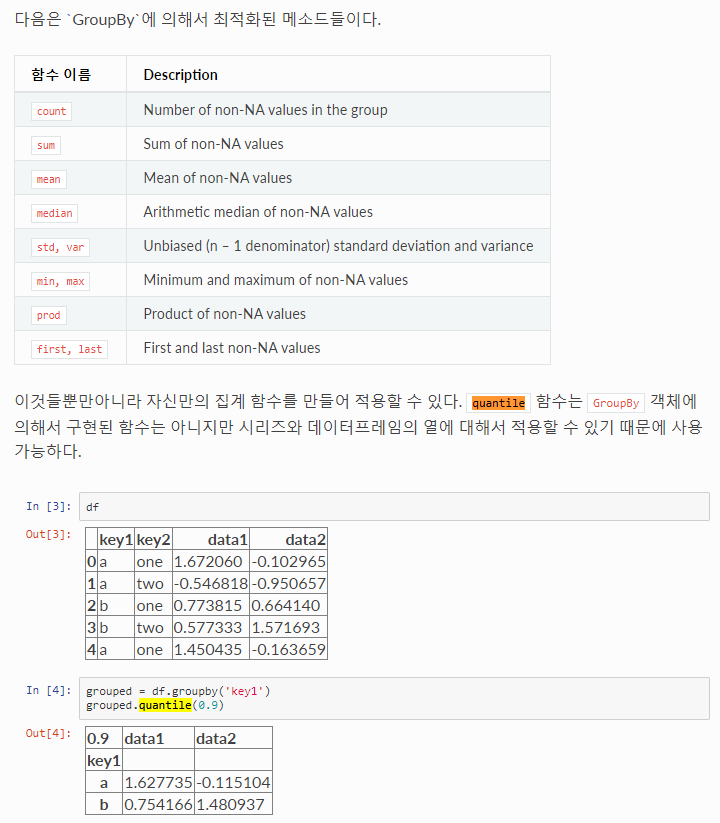  
출처 : https://compmath.korea.ac.kr/appmath/DataAggregationGroupOp.html

### groupby 데이터프레임으로부터 생성한 인덱스 대신 default index 사용하기 : reset_index

In [61]:
nls97.groupby(['highestdegree'])['weeksworked06'].apply(gettots).reset_index()

,highestdegree,level_1,weeksworked06
0,0. None,qr1,5
1,0. None,med,34
2,0. None,qr3,52
3,0. None,count,703
4,1. GED,qr1,13
5,1. GED,med,42
6,1. GED,qr3,52
7,1. GED,count,"1,104"
8,2. High School,qr1,31
9,2. High School,med,52


### unstack과 엮어서 요약 변수에 기초한 열 생성하기 
highestdegree 값을 인덱스로 하고, 집계값들이 열이 되는 데이터프레임을 만들 수 있음

In [65]:
nlssums = nls97.groupby(['highestdegree'])['weeksworked06'].apply(gettots).unstack()
nlssums

,qr1,med,qr3,count
highestdegree,,,,
0. None,5,34,52,703
1. GED,13,42,52,"1,104"
2. High School,31,52,52,"3,368"
3. Associates,34,52,52,722
4. Bachelors,38,52,52,"1,642"
5. Masters,39,52,52,601
6. PhD,29,50,52,53
7. Professional,4,29,49,117
